<a href="https://colab.research.google.com/github/kumar-abhishek/imbalanced-machine-learning-book/blob/main/chapter-4/Code_ensemble_methods_used_in_chapter_4_docx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting helper function

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_dataset(X, y):
  cmap_bold = ["darkorange", "darkblue"]
  markers = {1: "X", 0: "v"}
  sns.scatterplot(
      x=X[:, 0],
      y=X[:, 1],
      hue=y,
      palette=cmap_bold,
      alpha=1.0,
      edgecolor="black",
      style=y, markers=markers
  )
  
def plot_decision_boundary(X, y, clf, clf_name):
  _, ax = plt.subplots()
  cmap_light = ListedColormap(["orange", "white"])
  disp = DecisionBoundaryDisplay.from_estimator(
      clf,
      X,
      cmap=cmap_light,
      ax=ax,
      response_method="predict",
      alpha=0.5,
      xlabel='feature_1',
      ylabel='feature_2',
  )
  disp.plot(plot_method="contour", cmap="gist_gray", ax = ax, alpha = 1.)
  # Plot also the training points
  plot_dataset(X, y)
  plt.title("2-Class classification using %s classifier" %clf_name)


# from: https://imbalanced-learn.org/stable/auto_examples/combine/plot_comparison_combine.html#sphx-glr-auto-examples-combine-plot-comparison-combine-py
def plot_decision_function(X, y, clf, ax):
  """Plot the decision function of the classifier and the original data"""
  plot_step = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(
      np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
  )

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, alpha=0.4)
  ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
  ax.set_title(f"Resampling using {clf[0].__class__.__name__}")

# Create dataset

y_train:  Counter({0: 62370, 1: 630})
y_test:  Counter({0: 26730, 1: 270})


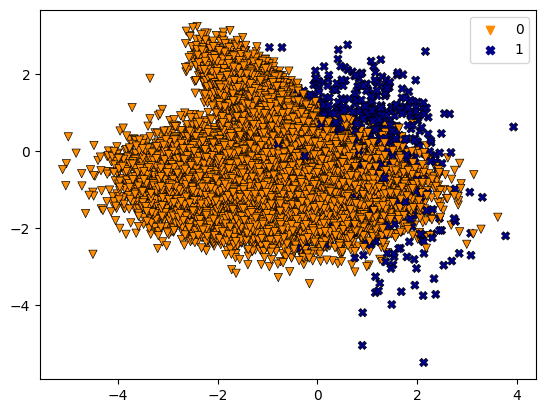

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
from collections import Counter

X, y = make_classification(n_samples=90000, n_features=2, 
                          n_redundant=0, n_classes=2, flip_y=0,
                          n_clusters_per_class=2, class_sep=0.89,
                          weights=[0.99], random_state=81)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)

print('y_train: ', Counter(y_train))
print('y_test: ', Counter(y_test))

plot_dataset(X_train, y_train)

# Random Forest

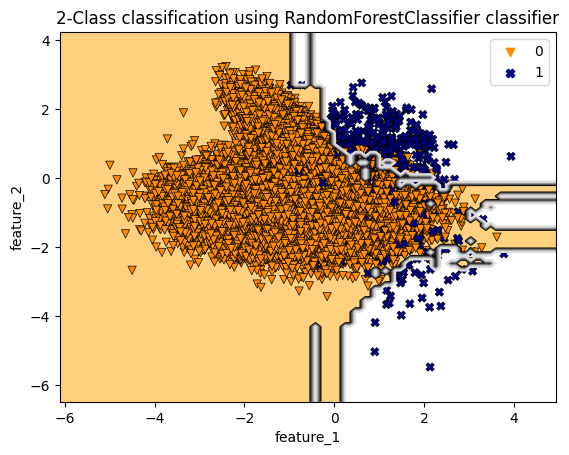

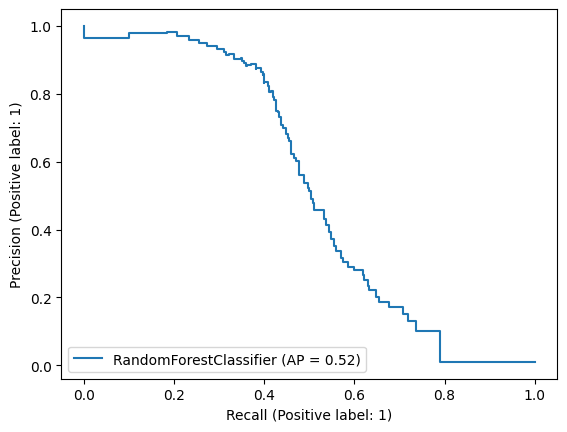

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import PrecisionRecallDisplay

RF_clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, RF_clf, 'RandomForestClassifier')
plt.show()

PrecisionRecallDisplay.from_estimator(RF_clf, X_test, y_test, ax = plt.gca(),name = "RandomForestClassifier")

# BaggingClassifier

In [ ]:
import numpy as np

from sklearn.ensemble import BaggingClassifier

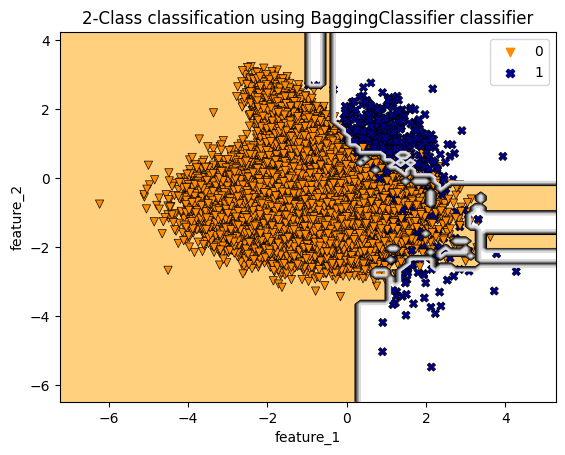

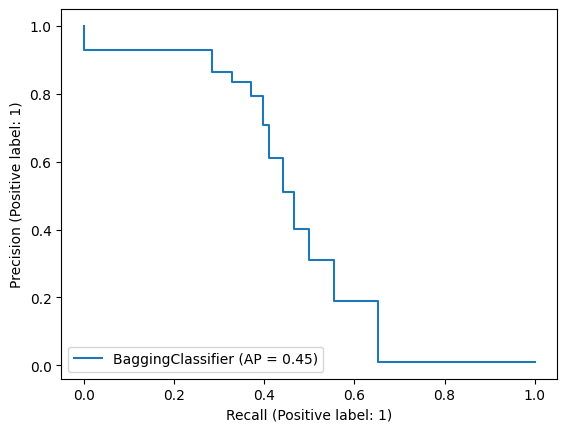

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import PrecisionRecallDisplay

clf = BaggingClassifier(random_state=0).fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, clf, 'BaggingClassifier')
plt.show()

PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax = plt.gca(),name = "BaggingClassifier")

# Underbagging via BalancedBaggingClassifier



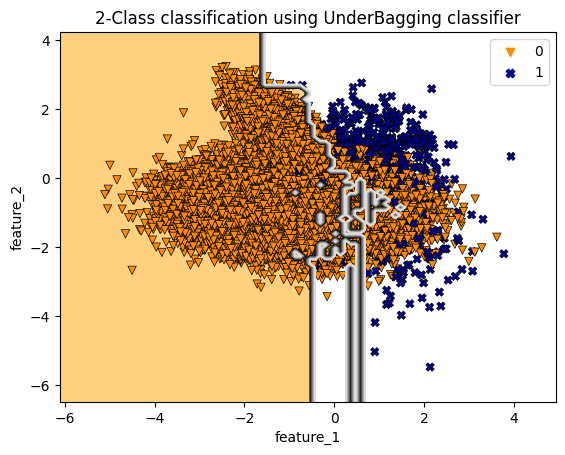

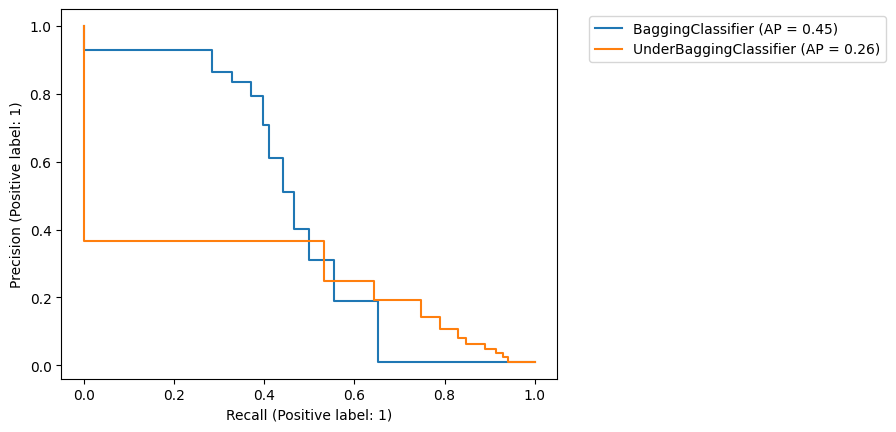

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
underbagging_clf = BalancedBaggingClassifier(estimator= DecisionTreeClassifier(), random_state=0).fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, underbagging_clf, 'UnderBagging')

plt.show()

PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax = plt.gca(),name = "BaggingClassifier")
PrecisionRecallDisplay.from_estimator(underbagging_clf, X_test, y_test, ax = plt.gca(),name = "UnderBaggingClassifier")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Overbagging via BalancedBaggingClassifier



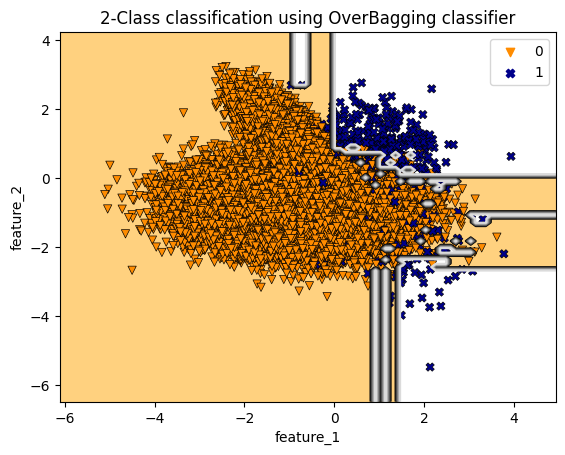

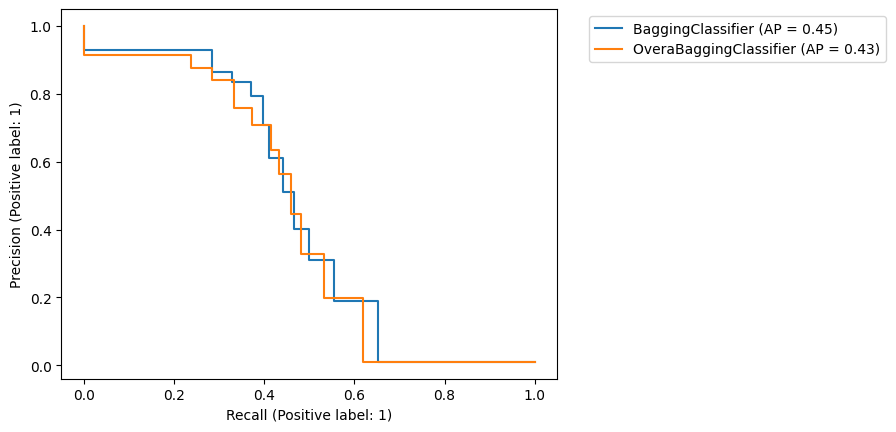

In [ ]:
import imblearn
from imblearn.ensemble import BalancedBaggingClassifier

overbagging_clf = BalancedBaggingClassifier(random_state=0, sampler=imblearn.over_sampling.RandomOverSampler()).fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, overbagging_clf, 'OverBagging')
plt.show()

PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax = plt.gca(),name = "BaggingClassifier")
PrecisionRecallDisplay.from_estimator(overbagging_clf, X_test, y_test, ax = plt.gca(),name = "OveraBaggingClassifier")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


# SMOTEBagging via BalancedBaggingClassifier

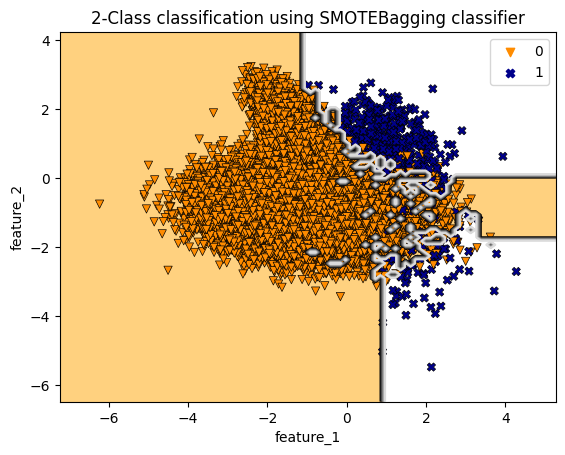

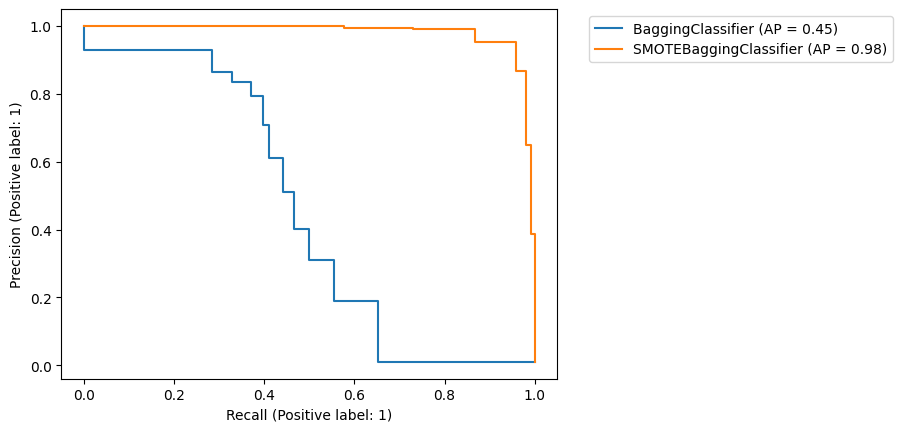

In [ ]:
import imblearn
from imblearn.ensemble import BalancedBaggingClassifier

smotebagging_clf = BalancedBaggingClassifier(random_state=0, sampler=imblearn.over_sampling.SMOTE()).fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, smotebagging_clf, 'SMOTEBagging')
plt.show()

PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax = plt.gca(),name = "BaggingClassifier")
PrecisionRecallDisplay.from_estimator(smotebagging_clf, X_test, y_test, ax = plt.gca(),name = "SMOTEBaggingClassifier")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


# Boosting Classifier via sklearn.ensemble.AdaBoostClassifier

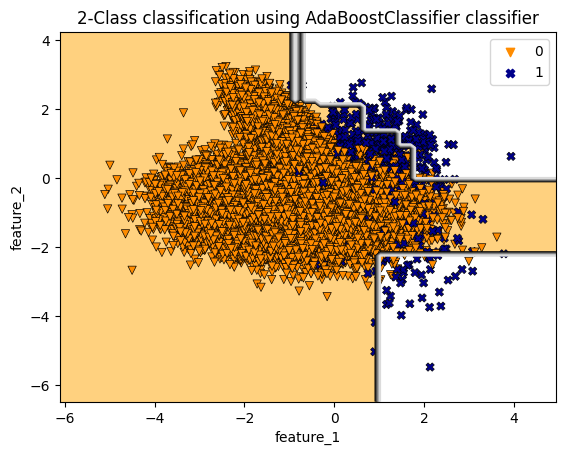

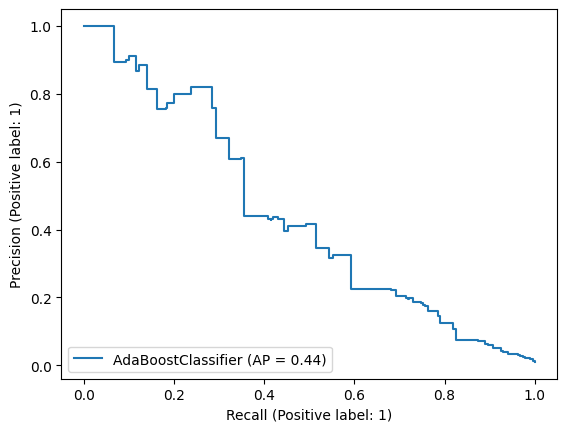

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(random_state=0).fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, adaboost_clf, 'AdaBoostClassifier')
plt.show()

PrecisionRecallDisplay.from_estimator(adaboost_clf, X_test, y_test, ax = plt.gca(),name = "AdaBoostClassifier")

# RUSBoostClassifier

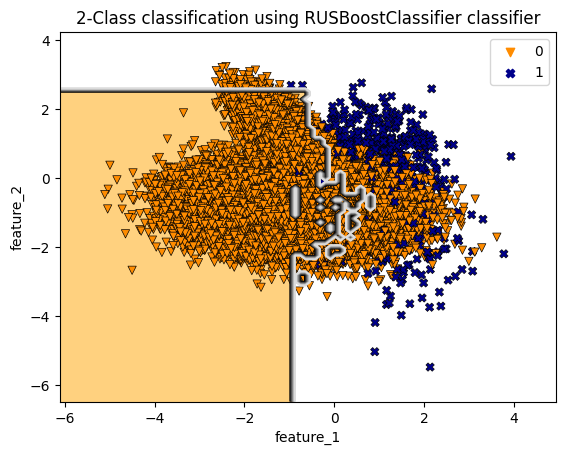

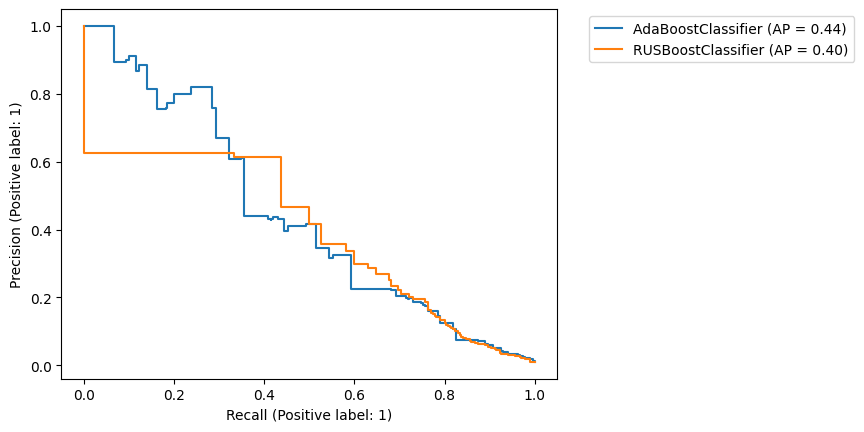

In [ ]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.tree import DecisionTreeClassifier

rusboost_clf = RUSBoostClassifier(random_state=0, estimator=DecisionTreeClassifier()).fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, rusboost_clf, 'RUSBoostClassifier')
plt.show()

PrecisionRecallDisplay.from_estimator(adaboost_clf, X_test, y_test, ax = plt.gca(),name = "AdaBoostClassifier")
PrecisionRecallDisplay.from_estimator(rusboost_clf, X_test, y_test, ax = plt.gca(),name = "RUSBoostClassifier")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


# EasyEnsemble

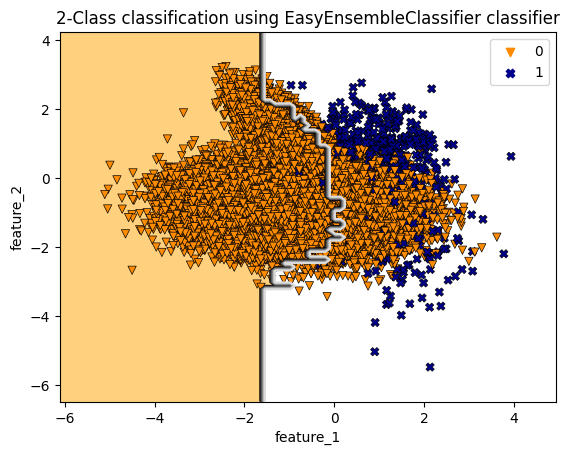

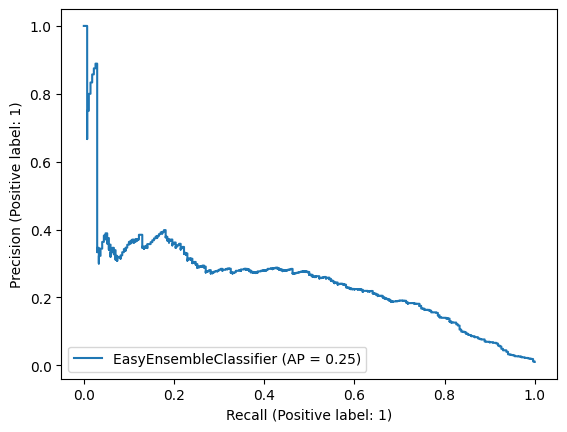

In [103]:
from imblearn.ensemble import EasyEnsembleClassifier

easyensemble_clf = EasyEnsembleClassifier(random_state=0).fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, easyensemble_clf, 'EasyEnsembleClassifier')
plt.show()

PrecisionRecallDisplay.from_estimator(easyensemble_clf, X_test, y_test, ax = plt.gca(),name = "EasyEnsembleClassifier")

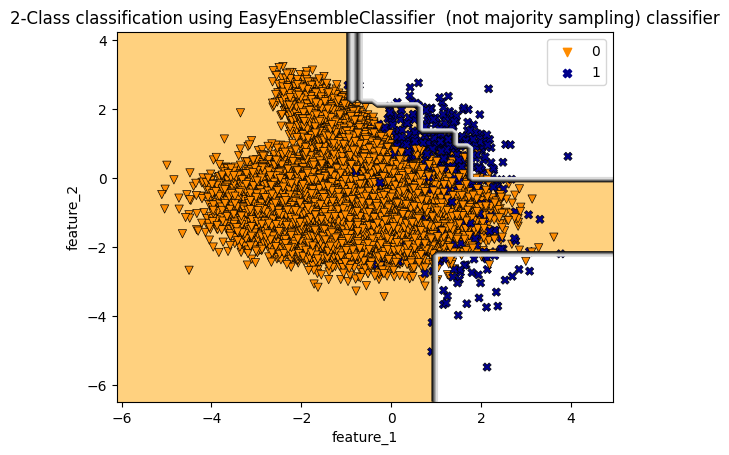

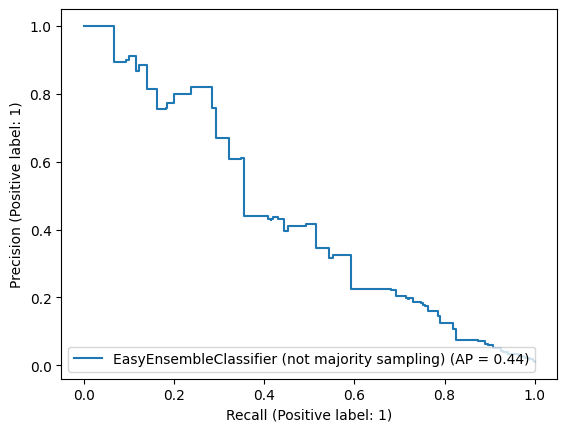

In [ ]:
easyensemble_notmajor_clf = EasyEnsembleClassifier(random_state=0, sampling_strategy='not majority').fit(X_train, y_train)

plot_decision_boundary(X_train, y_train, easyensemble_notmajor_clf, 'EasyEnsembleClassifier  (not majority sampling)')
plt.show()

PrecisionRecallDisplay.from_estimator(easyensemble_notmajor_clf, X_test, y_test, ax = plt.gca(),name = "EasyEnsembleClassifier (not majority sampling)")

# FInal comaprison

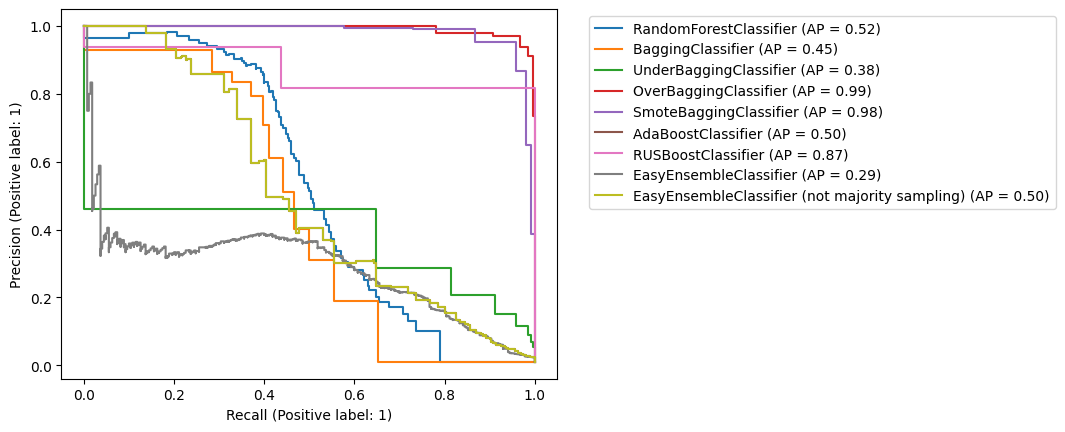

In [ ]:
PrecisionRecallDisplay.from_estimator(RF_clf, X_test, y_test, ax = plt.gca(),name = "RandomForestClassifier")
PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax = plt.gca(),name = "BaggingClassifier")
PrecisionRecallDisplay.from_estimator(underbagging_clf, X_test, y_test, ax = plt.gca(),name = "UnderBaggingClassifier")
PrecisionRecallDisplay.from_estimator(overbagging_clf, X_test, y_test, ax = plt.gca(),name = "OverBaggingClassifier")
PrecisionRecallDisplay.from_estimator(smotebagging_clf, X_test, y_test, ax = plt.gca(),name = "SmoteBaggingClassifier")
PrecisionRecallDisplay.from_estimator(adaboost_clf, X_test, y_test, ax = plt.gca(),name = "AdaBoostClassifier")
PrecisionRecallDisplay.from_estimator(rusboost_clf, X_test, y_test, ax = plt.gca(),name = "RUSBoostClassifier")
PrecisionRecallDisplay.from_estimator(easyensemble_clf, X_test, y_test, ax = plt.gca(),name = "EasyEnsembleClassifier")
PrecisionRecallDisplay.from_estimator(easyensemble_notmajor_clf, X_test, y_test, ax = plt.gca(),name = "EasyEnsembleClassifier (not majority sampling)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

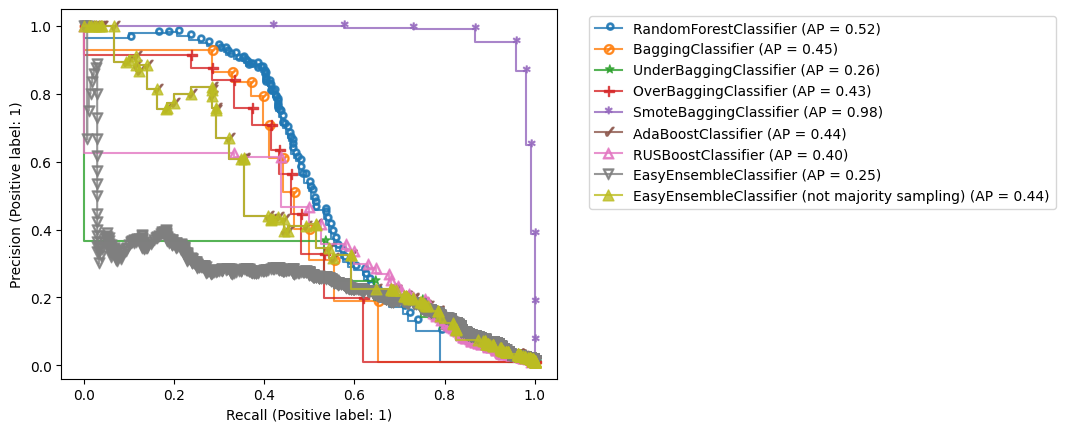

In [99]:
def kwargs(num):
  return {'alpha': 0.8, 'marker': getRandomMarker(num), 'markersize': 8}

markers = ['\circ', '\oslash', 
           '\star', '+', '*',
            '\\checkmark', '\\vartriangle', '\\triangledown', '\\blacktriangle']

def getRandomMarker(i):
  return "$"+markers[i]+"$"

PrecisionRecallDisplay.from_estimator(RF_clf, X_test, y_test, ax = plt.gca(),name = "RandomForestClassifier", **kwargs(0))
PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax = plt.gca(),name = "BaggingClassifier", **kwargs(1))
PrecisionRecallDisplay.from_estimator(underbagging_clf, X_test, y_test, ax = plt.gca(),name = "UnderBaggingClassifier", **kwargs(2))
PrecisionRecallDisplay.from_estimator(overbagging_clf, X_test, y_test, ax = plt.gca(),name = "OverBaggingClassifier", **kwargs(3))
PrecisionRecallDisplay.from_estimator(smotebagging_clf, X_test, y_test, ax = plt.gca(),name = "SmoteBaggingClassifier", **kwargs(4))
PrecisionRecallDisplay.from_estimator(adaboost_clf, X_test, y_test, ax = plt.gca(),name = "AdaBoostClassifier", **kwargs(5))
PrecisionRecallDisplay.from_estimator(rusboost_clf, X_test, y_test, ax = plt.gca(),name = "RUSBoostClassifier", **kwargs(6))
PrecisionRecallDisplay.from_estimator(easyensemble_clf, X_test, y_test, ax = plt.gca(),name = "EasyEnsembleClassifier", **kwargs(7))
PrecisionRecallDisplay.from_estimator(easyensemble_notmajor_clf, X_test, y_test, ax = plt.gca(),name = "EasyEnsembleClassifier (not majority sampling)", **kwargs(8))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
